In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
from sklearn.model_selection import train_test_split
import network
# import cupy as cp

In [3]:
df = pd.read_csv("../samples/A_Z Handwritten Data.csv")

In [4]:
image_size = 28

def vec2img(v):
    index = v[0]
    img = np.array(v[1:]).reshape(image_size, image_size)
    plt.imshow(img)
    plt.show()
    return chr(index + 97), img

In [ ]:
parent_dir = "C:\\github\\deep-scratch\\samples\\english"

index = 1
lastc = None

for _, row in df.iterrows():
    c, img = vec2img(row)
    if c!= lastc:
        index = 1
    try:
        os.mkdir(os.path.join(parent_dir, c))
    except:
        pass
    
    path = os.path.join(parent_dir, c, f"{index}.jpg")
    matplotlib.image.imsave(path, img, cmap='gray')
    index += 1
    lastc = c

In [5]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for c in range(26):
    train, test = train_test_split(df[df['0'] == c], test_size=0.2, shuffle=True)
    df_train = df_train.append(train, ignore_index=True)
    df_test = df_test.append(test, ignore_index=True)
    
del df
df_train = df_train.sample(frac = 1).reset_index(drop=True)

In [6]:
X_train = df_train[df_train.columns[1:]].to_numpy()
X_train.shape

(297950, 784)

In [7]:
y_train = df_train[df_train.columns[0]].values.astype(np.int32)
y_train = np.array([np.array([0] * i + [1] + [0] * (25 - i)) for i in y_train])
y_train.shape

del df_train

In [8]:
model = network.Network(inputDim=image_size ** 2, intializationScheme='glorot-uniform')
model.addLayer(dim = 300, activation='sigmoid')
model.addLayer(dim = 26, activation='softmax')
model.compile(loss='cat-crossentropy', optimizer='gd', batch_type="mbgd", batch_size=500)

Epoch 1: calculated loss = 0.875029076623 | calculated accuracy = 0.77984
Epoch 2: calculated loss = 0.473917340471 | calculated accuracy = 0.87896
Epoch 3: calculated loss = 0.386671967105 | calculated accuracy = 0.90077
Epoch 4: calculated loss = 0.338019543184 | calculated accuracy = 0.91248
Epoch 5: calculated loss = 0.303871968341 | calculated accuracy = 0.92160
Epoch 6: calculated loss = 0.278349818547 | calculated accuracy = 0.92825
Epoch 7: calculated loss = 0.258735152765 | calculated accuracy = 0.93315
Epoch 8: calculated loss = 0.242944746443 | calculated accuracy = 0.93738
Epoch 9: calculated loss = 0.228442397010 | calculated accuracy = 0.94118
Epoch 10: calculated loss = 0.216529844188 | calculated accuracy = 0.94460
Epoch 11: calculated loss = 0.207380153849 | calculated accuracy = 0.94672
Epoch 12: calculated loss = 0.199027125623 | calculated accuracy = 0.94906
Epoch 13: calculated loss = 0.190491453460 | calculated accuracy = 0.95150
Epoch 14: calculated loss = 0.1822

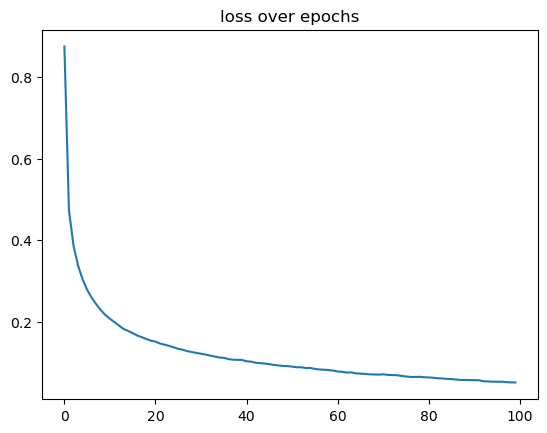

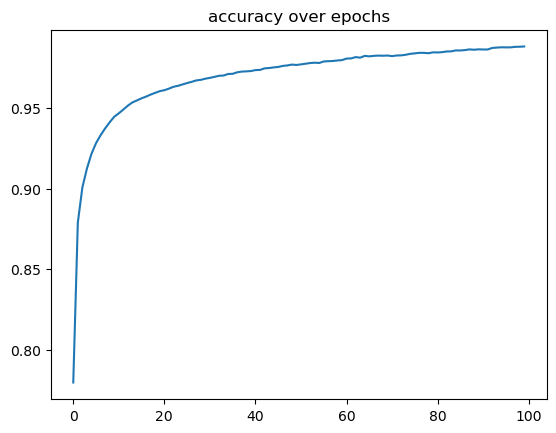

In [9]:
model.train(X_train.T, y_train.T, alpha=0.05, epochs = 100)
del X_train
del y_train

In [10]:
X_test = df_test[df_test.columns[1:]].to_numpy()
X_test.shape

(74500, 784)

In [11]:
y_test = df_test[df_test.columns[0]].values.astype(np.int32)
y_test = np.array([np.array([0] * i + [1] + [0] * (25 - i)) for i in y_test])
y_test.shape

(74500, 26)

In [12]:
del df_test

In [32]:
pred, accuracy = model.predict(X_test.T, y_test.T)
print(f"testing accuracy on english letter dataset: {100 * accuracy:.2f}%")

testing accuracy on english letter dataset: 97.78%


In [20]:
d = pd.DataFrame()
d["actual"] = np.where(y_test == 1)[1]
v = []
for p in pred.T:
    if 1 in p:
        v.append(np.where(p == 1)[0][0])
    else:
        v.append(-1)
d["predicted"] = np.array(v).astype(np.int)

In [26]:
d[d['actual']==d['predicted']].count()['actual'] / d['actual'].count() * 100

97.77718120805369

In [27]:
model.flushnn(filename='english.json')

neural network flushed to english.json


In [ ]:
del d

In [33]:
del model

In [34]:
del pred